# Traffic Sign Classification with Keras

Keras exists to make coding deep neural networks simpler. To demonstrate just how easy it is, you’re going to use Keras to build a convolutional neural network in a few dozen lines of code.

You’ll be connecting the concepts from the previous lessons to the methods that Keras provides.

In [2]:
from urllib.request import urlretrieve
from os.path import isfile
from sklearn.utils import shuffle
from sklearn import preprocessing


if not isfile('train.p'):
    print('Downloading train dataset...')
    urlretrieve('https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/train.p', 'train.p')

if not isfile('test.p'):
    print('Downloading test dataset...')
    urlretrieve('https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/test.p', 'test.p')

print('Training and Test data downloaded.')

Training and Test data downloaded.


In [3]:
import pickle
import numpy as np
import math
from sklearn.utils import shuffle
# Fix error with TF and Keras
import tensorflow as tf
tf.python.control_flow_ops = tf

print('Modules loaded.')

Modules loaded.


In [4]:
with open('train.p', 'rb') as f:
    data = pickle.load(f)

# TODO: Implement load the data here.
X_train, y_train = data['features'], data['labels'] #<-- added

In [5]:
# TODO: Shuffle the data
X_train, y_train = shuffle(X_train, y_train,random_state=20) #<-- Added

In [6]:
# TODO: Normalize the data features

def x_normalize(image_data):
    a = -.5
    b = .5
    x_min = 0
    x_max = 255
    return a + ( ( (image_data - x_min)*(b - a) )/( x_max - x_min ) )

X_normalized = x_normalize(X_train)

In [7]:
# TODO: One Hot encode the labels

encoder = preprocessing.LabelBinarizer()
encoder.fit(y_train)
y_one_hot = encoder.transform(y_train) #<-- Had to label my "encoder y_one_hot"

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop


Using TensorFlow backend.


In [15]:
# TODO: Build a Model

model = Sequential()

model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(32, 32, 3)))

model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))

model.add(Activation('relu'))

model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(43))

model.add(Activation('softmax'))


model.compile('Adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=250, validation_split=0.2)

Train on 31367 samples, validate on 7842 samples
Epoch 1/250
31367/31367 [==============================] - 3s - loss: 2.0108 - acc: 0.4459 - val_loss: 0.5626 - val_acc: 0.8653
Epoch 2/250
31367/31367 [==============================] - 3s - loss: 0.6681 - acc: 0.7969 - val_loss: 0.2222 - val_acc: 0.9457
Epoch 3/250
31367/31367 [==============================] - 3s - loss: 0.4114 - acc: 0.8757 - val_loss: 0.1375 - val_acc: 0.9703
Epoch 4/250
31367/31367 [==============================] - 3s - loss: 0.3053 - acc: 0.9061 - val_loss: 0.1026 - val_acc: 0.9779
Epoch 5/250
31367/31367 [==============================] - 3s - loss: 0.2415 - acc: 0.9270 - val_loss: 0.0754 - val_acc: 0.9851
Epoch 6/250
31367/31367 [==============================] - 3s - loss: 0.2092 - acc: 0.9364 - val_loss: 0.0575 - val_acc: 0.9867
Epoch 7/250
31367/31367 [==============================] - 3s - loss: 0.1789 - acc: 0.9448 - val_loss: 0.0562 - val_acc: 0.9865
Epoch 8/250
31367/31367 [==============================

loss: 15.87%
acc: 97.85%
dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])


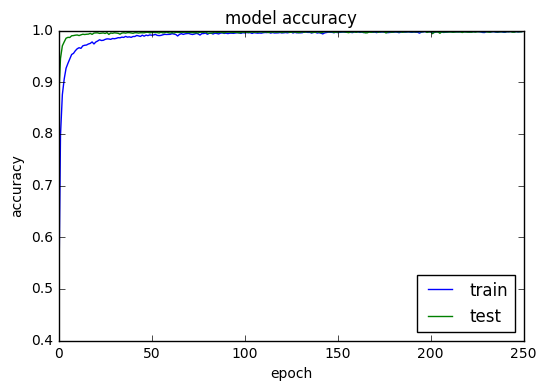

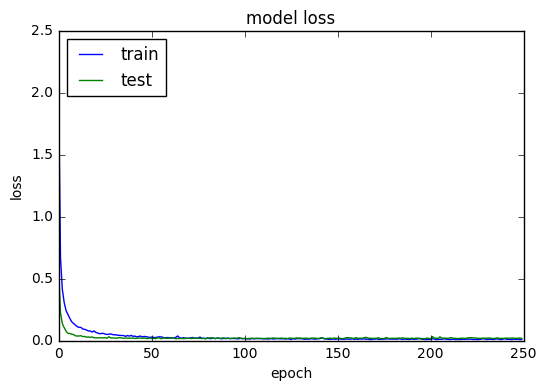

In [16]:
import matplotlib.pyplot as plt



# TODO: Load test data
with open('test.p', 'rb') as f:
    data2 = pickle.load(f)

# Assign Data
X_test, y_test = data2['features'], data2['labels']







# TODO: Preprocess data & one-hot encode the labels

# Shuffle the data
X_test, y_test = shuffle(X_test, y_test,random_state=20)

# Normalize
test_normalized = x_normalize(X_test)

# One Hot Encode
encoder = preprocessing.LabelBinarizer()
encoder.fit(y_test)
y_test_one_hot = encoder.transform(y_test) 


# TODO: Evaluate model on test data

scores = model.evaluate(test_normalized, y_test_one_hot, verbose=0)

print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
loss: 17.48%
acc: 96.83%
    
loss: 14.66%
acc: 97.76%

loss: 15.87%
acc: 97.85%